In [2]:
import requests
from bs4 import BeautifulSoup

url = "https://coinmarketcap.com/fr/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

elements = soup.find_all('tr', class_=lambda value: value and 'sc-' in value)



In [3]:
def get_elements_with_cursor_pointer(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    elements = soup.find_all('tr', style=lambda style: style and 'cursor:pointer' in style)
    return elements

In [4]:
cursor_pointer_elements = get_elements_with_cursor_pointer(url)

elements = cursor_pointer_elements + elements


In [5]:
filtered_elements = []
seen_markets = set()

for element in elements:
    crypto_name = element.find('a', class_='cmc-link').text.strip()

    if 'cursor:pointer' in element.get('style', ''):
        price = element.find_all('td')[3].text.strip()
        crypto_market = element.find_all('td')[-2].text.strip() 
    else:
        price = element.find_all('td')[-2].text.strip()
        crypto_market = element.find('a', class_='cmc-link')['href'].split('/')[-2].capitalize()

    if crypto_market not in seen_markets:
        filtered_elements.append((crypto_name, price, crypto_market))
        seen_markets.add(crypto_market)

# Afficher les éléments filtrés
for crypto_name, price, crypto_market in filtered_elements:
    print(crypto_name, price, crypto_market)
 

BitcoinBTC €65,668.18 19,665,712 BTC
EthereumETH €3,354.44 120,073,215 ETH
Tether USDtUSDT €0.9248 104,362,092,744 USDT
BNBBNB €536.45 149,536,620 BNB
SolanaSOL €175.44 444,306,679 SOL
XRPXRP €0.5812 54,884,241,878 XRP
USDCUSDC €0.9249 32,287,299,828 USDC
DogecoinDOGE €0.1749 143,639,236,384 DOGE
CardanoADA €0.6134 35,578,756,687 ADA
AvalancheAVAX €51.09 377,416,536 AVAX
Shiba InuSHIB $0.00 Shiba-inu
ToncoinTON $4.98 Toncoin
PolkadotDOT $9.77 Polkadot-new
ChainlinkLINK $19.87 Chainlink
TRONTRX $0.12 Tron
PolygonMATIC $1.07 Polygon
Bitcoin CashBCH $506.60 Bitcoin-cash
Internet ComputerICP $19.53 Internet-computer
NEAR ProtocolNEAR $7.84 Near-protocol
UniswapUNI $12.71 Uniswap
AptosAPT $18.18 Aptos
LitecoinLTC $96.86 Litecoin
UNUS SED LEOLEO $6.07 Unus-sed-leo
DaiDAI $1.00 Multi-collateral-dai
StacksSTX $3.51 Stacks
FilecoinFIL $9.50 Filecoin
CosmosATOM $12.74 Cosmos
Ethereum ClassicETC $32.31 Ethereum-classic
ArbitrumARB $1.71 Arbitrum
MantleMNT $1.41 Mantle
RenderRNDR $11.68 Render
Imm

In [6]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="scrap"
)
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS crypto_info')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS crypto_info (
        id INT AUTO_INCREMENT PRIMARY KEY,
        name VARCHAR(255),
        price VARCHAR(255),
        market VARCHAR(255)
    )
''')

for crypto_name, price, crypto_market in filtered_elements:   
    cursor.execute('INSERT INTO crypto_info (name, price, market) VALUES (%s, %s, %s)', (crypto_name, price, crypto_market))

conn.commit()
conn.close()

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="scrap"
)
cursor = conn.cursor()

cursor.execute('SELECT * FROM crypto_info')
rows = cursor.fetchall()

print("Table crypto_info:")
for row in rows:
    print(row)

conn.close()


Table crypto_info:
(1, 'BitcoinBTC', '€65,668.18', '19,665,712 BTC')
(2, 'EthereumETH', '€3,354.44', '120,073,215 ETH')
(3, 'Tether USDtUSDT', '€0.9248', '104,362,092,744 USDT')
(4, 'BNBBNB', '€536.45', '149,536,620 BNB')
(5, 'SolanaSOL', '€175.44', '444,306,679 SOL')
(6, 'XRPXRP', '€0.5812', '54,884,241,878 XRP')
(7, 'USDCUSDC', '€0.9249', '32,287,299,828 USDC')
(8, 'DogecoinDOGE', '€0.1749', '143,639,236,384 DOGE')
(9, 'CardanoADA', '€0.6134', '35,578,756,687 ADA')
(10, 'AvalancheAVAX', '€51.09', '377,416,536 AVAX')
(11, 'Shiba InuSHIB', '$0.00', 'Shiba-inu')
(12, 'ToncoinTON', '$4.98', 'Toncoin')
(13, 'PolkadotDOT', '$9.77', 'Polkadot-new')
(14, 'ChainlinkLINK', '$19.87', 'Chainlink')
(15, 'TRONTRX', '$0.12', 'Tron')
(16, 'PolygonMATIC', '$1.07', 'Polygon')
(17, 'Bitcoin CashBCH', '$506.60', 'Bitcoin-cash')
(18, 'Internet ComputerICP', '$19.53', 'Internet-computer')
(19, 'NEAR ProtocolNEAR', '$7.84', 'Near-protocol')
(20, 'UniswapUNI', '$12.71', 'Uniswap')
(21, 'AptosAPT', '$18.18',

Nombre total d'éléments : 100
Format des prix des jetons : <class 'float'>


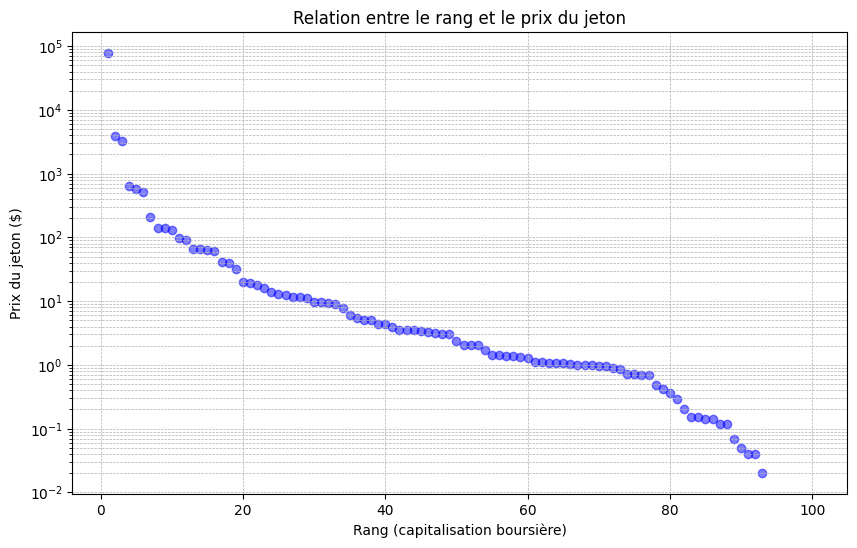

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul du nombre total d'éléments
total_elements = len(filtered_elements)
print("Nombre total d'éléments :", total_elements)

# Examiner le format des prix des jetons et les convertir en dollars si nécessaire
prices = []
for element in filtered_elements:
    price_str = element[1].replace('$', '').replace(',', '')  # Suppression des symboles de devise et des virgules
    if '€' in price_str:  # Si le prix est en euros, le convertir en dollars
        price_str = str(float(price_str.replace('€', '')) * 1.18)  # Conversion en dollars à un taux de change approximatif
    prices.append(float(price_str))

print("Format des prix des jetons :", type(prices[0]))

# Tracer un graphique de dispersion pour visualiser la relation entre le rang et le prix du jeton
ranks = np.arange(1, total_elements + 1)
prices_sorted = sorted(prices, reverse=True)  # Trie des prix dans l'ordre décroissant pour le graphique

plt.figure(figsize=(10, 6))
plt.scatter(ranks, prices_sorted, color='blue', alpha=0.5)
plt.title('Relation entre le rang et le prix du jeton')
plt.xlabel('Rang (capitalisation boursière)')
plt.ylabel('Prix du jeton ($)')
plt.yscale('log')  # Échelle logarithmique pour mieux visualiser les données
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()